# Introduction to the [MNIST dataset](http://yann.lecun.com/exdb/mnist/index.html)
This dataset of handwritten digits is popular in machine learning research.<br>
The training set contains 60,000 examples, and the test set 10,000 examples.<br>
The digits have been roughly size-normalized and centered in a 28x28 image.

## Preliminaries
import Python packages
- torch is used here for numerical linear algebra
- torchvision for the MNIST dataset
- minor usage of numpy for some numerical operations
- matplotlib for visualizing images and generating histograms

In [1]:
import torch
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

Make plots grayscale (white on black) and display inline.

In [2]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

## Download MNIST training set (or load if already downloaded)

In [3]:
mnist_train = datasets.MNIST(root='data', train=True, download=True)       # train data only
trainimages = mnist_train.data
trainlabels = mnist_train.targets

100%|██████████| 9912422/9912422 [00:00<00:00, 104311932.49it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 56368401.03it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28240115.79it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12683441.26it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



`trainimages` is a [Torch tensor](https://pytorch.org/docs/stable/tensors.html) containing 60,000 images of handwritten digits.\
Each image is 28x28.\
You can display these dimensions with the `shape` attribute.

In [4]:
print(f"Dimensions of training images: {trainimages.shape}")

Dimensions of training images: torch.Size([60000, 28, 28])


The pixel values are `uint8`, running from 0 to 255.<br>
Here are the pixel values of the first image.

In [5]:
trainimages[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

## Visualizing images

You can use `matshow` or `imshow`. The difference is explained [here](https://stackoverflow.com/questions/41910060/animation-quality-is-better-with-matshow-than-with-imshow-how-to-improve-it#:~:text=Matplotlib%20matshow%20is%20a%20wrapper,from%20interpolation%3D%22none%22%20.).

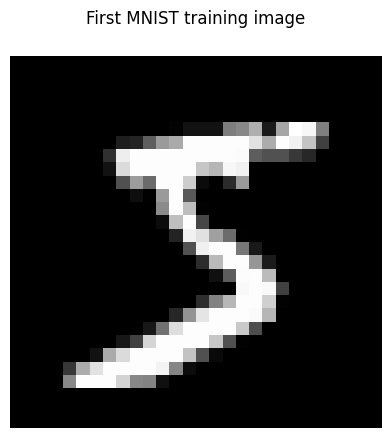

In [6]:
plt.matshow(trainimages[0])
plt.axis('off')
plt.title("First MNIST training image");

The following `montage` function is useful for displaying multiple images.\
`imgstack` is a stack of multiple images.\
`width` and `height` refer to the array of subplots.

In [7]:
def montage(imgstack):
    nimg = imgstack.size(dim = 0)
    width = int(np.ceil(np.sqrt(nimg)))   # compute a roughly square layout for the panels
    height = int(np.ceil(nimg / width))
    for i in range(nimg):
        ax = plt.subplot(height, width, i+1)
        plt.matshow(imgstack[i], fignum = False)    # Having to remember fignum can be disadvantage of matshow
        plt.axis('off')

Show the first 16 train images

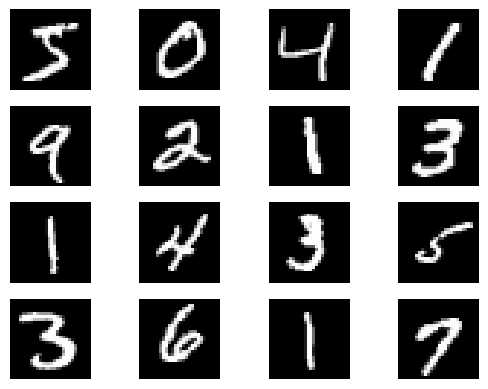

In [8]:
montage(trainimages[range(16)])

Display labels of the images above

In [9]:
trainlabels[range(16)]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])

## Pixelwise statistics of images
Compute and display mean of all images in training set.\
What happens if you leave out `float()`, and why?

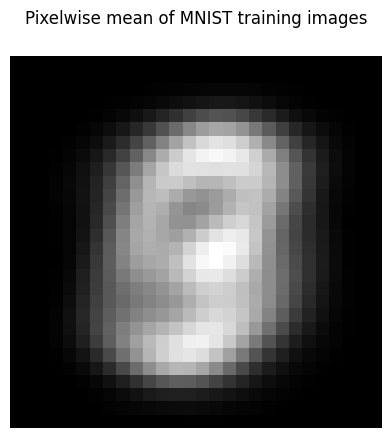

In [10]:
trainmean = torch.mean(trainimages.float(), dim=0)
plt.matshow(trainmean)
plt.axis('off')
plt.title("Pixelwise mean of MNIST training images");

The maximum value of `trainmean` lies between 0 and 255.

In [11]:
torch.max(trainmean)

tensor(139.5536)

Show pixels that are zero for all images in training set as black, pixels that are nonzero for at least one image as white.

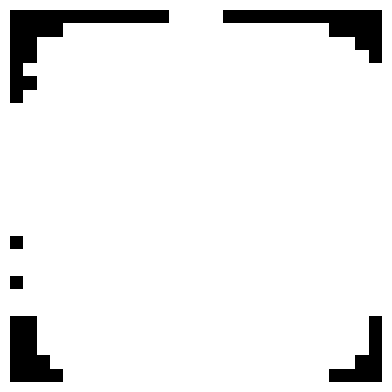

In [12]:
nonzero = torch.gt(trainmean, 0.0)
plt.matshow(nonzero)
plt.axis('off');

## Exercises

#### (a) Use `montage` to display the first 16 instances of "two" in `trainimages`.

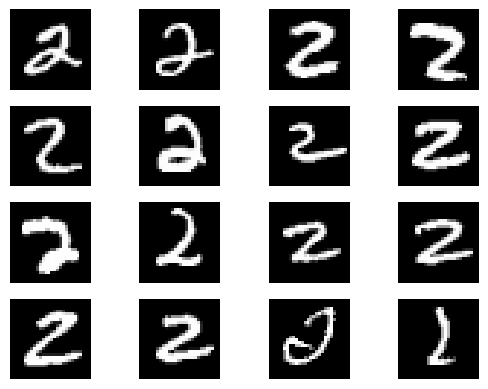

In [13]:
twoindices = (trainlabels == 2)
twoimages = trainimages[twoindices]

montage(twoimages[:16])

#### (b) Compute the pixelwise mean of the images in each digit class.
Display all class means as images using `montage`.\
Unlike the mean of the entire training set (computed above), the class means resemble digits.\
This is because the digits are roughly size-normalized and centered,\
so the within-class variability is limited.

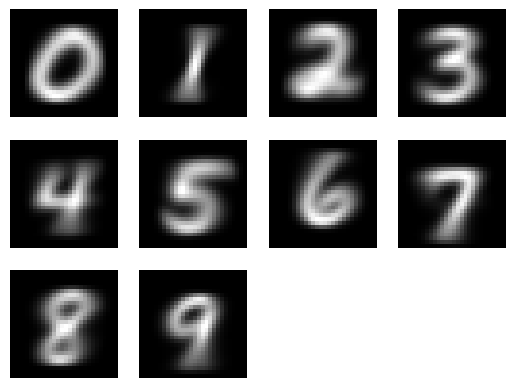

In [14]:
labelmeans = torch.empty(10, 28, 28)
for i in range(10):
  labelindices = trainlabels == i
  labelmeans[i] = torch.mean(trainimages[labelindices].float(), dim=0)

montage(labelmeans)

#### (c) Compute the pixelwise standard deviation of the images in each digit class
You can use `torch.std`. Display the results with `montage`.
Think about why the results look the way they do.

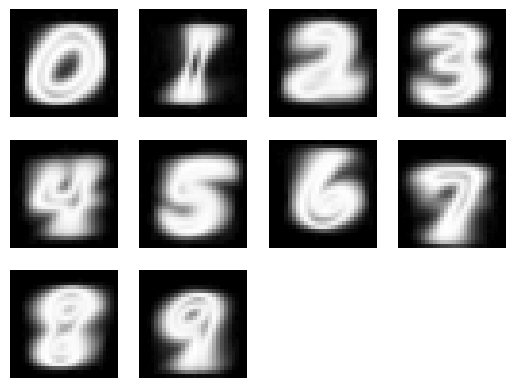

In [15]:
labelstd = torch.empty(10, 28, 28)
for i in range(10):
  labelindices = trainlabels == i
  labelstd[i] = torch.std(trainimages[labelindices].float(), dim=0)

montage(labelstd)

#### (d) Create a histogram showing how many instances of each of the ten digit classes exist in the training set.
You should use `plt.hist`.
Label the x and y axes, and put a title on top.\
There should be roughly 6,000 instances of each class, but not exactly.

Text(0.5, 1.0, 'Count of each label in MNIST')

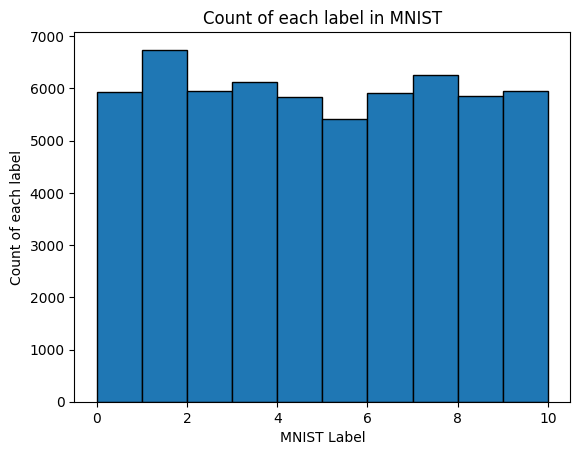

In [17]:
plt.hist(trainlabels, ec = 'black', bins = range(11))
plt.xlabel("MNIST Label")
plt.ylabel("Count of each label")
plt.title("Count of each label in MNIST")